In [1]:
import rule_based
import kmeans
import prophet_model

TRAIN_START = "2023-10-02 00:00"
TRAIN_END = "2023-11-11 23:59"
TEST_START = "2023-10-28 00:00"
TEST_END = "2023-10-31 23:59"

In [2]:
pred_rule = rule_based.train_and_predict(TRAIN_START, TRAIN_END, TEST_START, TEST_END)
print(pred_rule)

                     500101001  500101002  500101003  500101004  500101005  \
time                                                                         
2023-10-28 00:00:00        6.0        4.0       13.0       10.0        2.0   
2023-10-28 00:20:00        3.0        4.0       14.0        8.0        3.0   
2023-10-28 00:40:00        1.0        5.0       15.0        8.0        2.0   
2023-10-28 01:00:00        1.0        4.0       15.0        9.0        4.0   
2023-10-28 01:20:00        1.0        4.0       16.0       10.0        5.0   
...                        ...        ...        ...        ...        ...   
2023-10-31 22:20:00        2.0        1.0        3.0        1.0        1.0   
2023-10-31 22:40:00        1.0        1.0        4.0        1.0        1.0   
2023-10-31 23:00:00        2.0        1.0        4.0        2.0        1.0   
2023-10-31 23:20:00        4.0        1.0        4.0        2.0        1.0   
2023-10-31 23:40:00       11.0        2.0        5.0        2.0 

In [3]:

pred_kmeans = kmeans.train_and_predict(TRAIN_START, TRAIN_END, TEST_START, TEST_END)
print(pred_kmeans)

sno                  500101001  500101002  500101003  500101004  500101005  \
time                                                                         
2023-10-28 00:00:00        7.0        4.0       15.0        8.0        2.0   
2023-10-28 00:20:00        4.0        3.0       15.0        8.0        2.0   
2023-10-28 00:40:00        1.0        3.0       15.0        8.0        4.0   
2023-10-28 01:00:00        3.0        3.0       15.0       10.0        4.0   
2023-10-28 01:20:00        2.0        3.0       15.0       10.0        4.0   
...                        ...        ...        ...        ...        ...   
2023-10-31 22:20:00        3.0        1.0        6.0        1.0        1.0   
2023-10-31 22:40:00        6.0        1.0        9.0        1.0        1.0   
2023-10-31 23:00:00        4.0        1.0       14.0        1.0        1.0   
2023-10-31 23:20:00        6.0        0.0       13.0        1.0        1.0   
2023-10-31 23:40:00       11.0        1.0       13.0        2.0 

In [4]:
pred_prophet = prophet_model.train_and_predict_prophet(TRAIN_START, TRAIN_END, TEST_START, TEST_END)
print(pred_prophet)

21:49:46 - cmdstanpy - INFO - Chain [1] start processing
21:49:46 - cmdstanpy - INFO - Chain [1] start processing
21:49:46 - cmdstanpy - INFO - Chain [1] start processing
21:49:47 - cmdstanpy - INFO - Chain [1] start processing
21:49:47 - cmdstanpy - INFO - Chain [1] start processing
21:49:47 - cmdstanpy - INFO - Chain [1] start processing
21:49:48 - cmdstanpy - INFO - Chain [1] start processing
21:49:48 - cmdstanpy - INFO - Chain [1] start processing
21:49:48 - cmdstanpy - INFO - Chain [1] start processing
21:49:49 - cmdstanpy - INFO - Chain [1] start processing
21:49:49 - cmdstanpy - INFO - Chain [1] start processing
21:49:49 - cmdstanpy - INFO - Chain [1] start processing
21:49:49 - cmdstanpy - INFO - Chain [1] start processing
21:49:50 - cmdstanpy - INFO - Chain [1] start processing
21:49:50 - cmdstanpy - INFO - Chain [1] start processing
21:49:50 - cmdstanpy - INFO - Chain [1] start processing
21:49:51 - cmdstanpy - INFO - Chain [1] start processing
21:49:52 - cmdstanpy - INFO - C

                     500101001  500101002  500101003  500101004  500101005  \
time                                                                         
2023-10-28 00:00:00  10.796159   4.707018   7.021396   6.801170   3.696354   
2023-10-28 00:20:00  10.978898   5.013191   7.371013   7.069376   4.099596   
2023-10-28 00:40:00  10.884189   5.148007   7.650617   7.250350   4.433265   
2023-10-28 01:00:00  10.612096   5.131542   7.859735   7.352995   4.679130   
2023-10-28 01:20:00  10.286584   5.005360   8.003107   7.396374   4.830436   
...                        ...        ...        ...        ...        ...   
2023-10-31 22:20:00   4.407221   2.325797   5.222075   1.748177   0.423141   
2023-10-31 22:40:00   5.928601   2.960347   5.693115   2.173896   0.648730   
2023-10-31 23:00:00   7.333839   3.664917   6.156201   2.630234   0.963206   
2023-10-31 23:20:00   8.502346   4.359302   6.594524   3.078716   1.338626   
2023-10-31 23:40:00   9.352006   4.972491   6.992076   3.484877 

In [7]:
from datetime import time, date, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


def print_time_ranges(TRAIN_START: str, TRAIN_END: str, TEST_START: str, TEST_END: str):
    print(
        f"Train: {pd.to_datetime(TRAIN_START).strftime('%m/%d')} - {pd.to_datetime(TRAIN_END).strftime('%m/%d')}"
    )
    print(
        f"Test: {pd.to_datetime(TEST_START).strftime('%m/%d')} - {pd.to_datetime(TEST_END).strftime('%m/%d')}"
    )


# require date time
def plot_line(df, snos, name_suffix="", pred=None):
    for sno in snos:
        station_data = df[df["sno"] == sno]
        table = pd.pivot_table(station_data, values="sbi", index="time", columns="date")
        # dfp = df.pivot(index="time", columns="date", values="sbi").bfill()
        ax = table.plot(figsize=(14, 4), color="blue", legend=False)
        mean = table.mean(axis=1)
        ax = mean.plot(ax=ax, color="red", lw=2, legend=False)
        std = table.std(axis=1)
        ax = std.plot(ax=ax, color="yellow", legend=False)
        # table.resample("10T").plot(figsize=(12, 3), legend=False)
        plt.savefig(f"./lines/{sno}-{name_suffix}.png")
        plt.close(ax.get_figure())


def plot_all(df, result1, result2, ntu_snos, holidays):
    print("plotting all")

    df["datetime"] = df["time"]
    df["date"] = df["datetime"].dt.date
    df["time"] = df["datetime"].dt.time
    for d in range(7):
        day_df = df[df["datetime"].dt.weekday == d]
        plot_line(day_df, ntu_snos, str(d))

    holiday_df = df[df["date"].isin(holidays)]
    plot_line(holiday_df, ntu_snos, "holiday")
    weekday_df = df[~df["date"].isin(holidays)]
    plot_line(weekday_df, ntu_snos, "weekday")


long_holiday = (
    pd.date_range(start="2023-10-07", end="2023-10-10")
    .union(pd.date_range(start="2023-11-15", end="2023-11-15"))
    .union(pd.date_range(start="2023-11-24", end="2023-11-24"))
).date


def is_holiday(date: date):
    if date in long_holiday:
        return True
    # Check if the given date is a Saturday or Sunday
    if date.weekday() in [5, 6]:
        return True

    return False


def get_tot(df, snos):
    result_df = (
        df[df["sno"].isin(snos)]
        .groupby("sno", observed=True)["tot"]
        .first()
        .reset_index()
    )
    result_df.set_index("sno", inplace=True)
    result_df.columns = ["tot"]
    s_arr = result_df.values.reshape(-1)
    return s_arr


def date_range(start: str, end: str):
    return pd.date_range(start, end).date


# def evaluation(y_true, y_pred, tots):
#    print("MAE", mean_absolute_error(y_true, y_pred))
#
#    # yt is a row of many station's sbi
#    errors = np.array([mean_absolute_error(yt, yp) for yt, yp in zip(y_true, y_pred)])
#    # TODO make it time
#    xs = np.arange(len(errors))
#    plt.plot(xs, errors)
#    plt.savefig("error.png")
#
#    # errors2 = np.abs(y_pred - y_true).reshape(-1)
#    # counts, edges, bars = plt.hist(errors2, bins=len(set(errors2)))
#    # plt.bar_label(bars)
#    # plt.show()
#
#    # error function defined in the problem description
#    err = (
#        3
#        * np.abs((y_pred - y_true) / tots)
#        * (np.abs(y_true / tots - 1 / 3) + np.abs(y_true / tots - 2 / 3))
#    )
#    print("Score", err.mean())


# should make tot an array,which may change though time, sbi from 0 to tot.max


def error(y_true: np.ndarray, y_pred: np.ndarray, tots: np.ndarray) -> np.float64:
    return (
        3
        * np.abs((y_pred - y_true) / tots)
        * (np.abs(y_true / tots - 1 / 3) + np.abs(y_true / tots - 2 / 3))
    ).mean()


def evaluation(y_true, y_pred, tots, time_range, prefix=""):
    print("MAE: ", mean_absolute_error(y_true / tots, y_pred / tots))

    # yt is a row of many station's sbi at a time
    MAEs = np.array(
        [mean_absolute_error(yt, yp) for yt, yp in zip(y_true / tots, y_pred / tots)]
    )

    # Plot errors against timestamps
    plt.plot(time_range, MAEs, color="magenta")

    # error function defined in the problem description
    # tots is 1d array, but still fine for matrix /
    print("Score: ", error(y_true, y_pred, tots))

    # yt is a row of many station's sbi
    scores = np.array([error(yt, yp, tots) for yt, yp in zip(y_true, y_pred)])

    # plot score error
    plt.plot(time_range, scores, color="blue")

    # set up figure and save
    plt.xlabel("Time")
    plt.ylabel("Error")
    plt.title("Score(blue) & MAE(magenta)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(
        f"{prefix if prefix != '' else 'error'}-{datetime.now().strftime('%m-%d-%H-%M')}.png"
    )


def evaluation_all(y_true, y_pred_list, tots, time_range, df_names):
    # Initialize an array to store scores for each dataframe
    all_scores = []

    for i, y_pred in enumerate(y_pred_list):
        mae = mean_absolute_error(y_true / tots, y_pred / tots)
        print(f"MAE for {df_names[i]}: {mae}")

        # error function defined in the problem description
        # tots is a 1D array, but still fine for matrix division
        score = error(y_true, y_pred, tots)
        print(f"Score for {df_names[i]}: {score}")

        # yt is a row of many station's sbi
        scores = np.array([error(yt, yp, tots) for yt, yp in zip(y_true, y_pred)])
        all_scores.append(scores)

    # Plot scores for each dataframe on the same figure
    for i, scores in enumerate(all_scores):
        label = f"{df_names[i]}"
        plt.plot(time_range, scores, label=label)

    # Set up figure and save
    plt.xlabel("Time")
    plt.ylabel("Error")
    plt.title("Scores")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Save the figure with a timestamp
    # Extract start and end dates from time_range
    start_date = time_range[0].strftime("%m-%d")
    end_date = time_range[-1].strftime("%m-%d")

    # Save the figure with start and end dates
    plt.savefig(f"./final/error-{start_date}-{end_date}.png")

    # Show the plot
    plt.show()


# Example usage:
# evaluation(y_true, [y_pred_1, y_pred_2], tots, time_range, df_names=["Model A", "Model B"])


Train: 10/02 - 11/11
Test: 10/28 - 10/31
MAE for rule: 0.11261165471173715
Score for rule: 0.19566134951617897
MAE for kmeans: 0.12733307957540357
Score for kmeans: 0.2322505789523141
MAE for prophet: 0.13653022793201716
Score for prophet: 0.2907102225774372


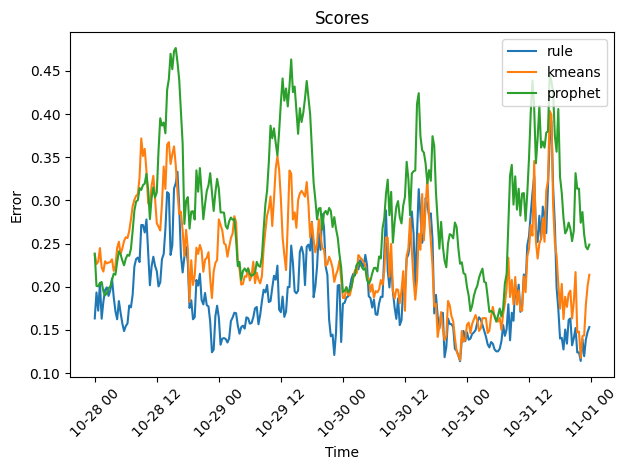

In [8]:
import pandas as pd
import numpy as np
#from utils import *


with open("./cache/small_data_cache.pkl", "rb") as f:
    df = pd.read_pickle(f)
with open("../html.2023.final.data/sno_test_set.txt") as f:
    ntu_snos = [l.strip() for l in f.read().splitlines()]
with open("./cache/10-03_12_09_rain.pkl", "rb") as f:
    rain_df = pd.read_pickle(f)

ntu_tots = get_tot(df, ntu_snos)

tb = (
    pd.pivot_table(df, index="time", columns="sno", values="sbi")
    .resample("20min")
    .first()
)
test = tb[tb.index.to_series().dt.date.isin(date_range(TEST_START, TEST_END))]
y_test = test.values

print_time_ranges(TRAIN_START, TRAIN_END, TEST_START, TEST_END)

evaluation_all(y_test,[pred_rule.to_numpy(), pred_kmeans.to_numpy(), pred_prophet.to_numpy()], ntu_tots,
                pd.date_range(TEST_START, TEST_END,freq='20min'),["rule","kmeans","prophet"])


